In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator

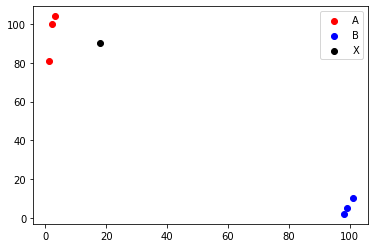

In [4]:
#已知分类数据
x1 = np.array([3,2,1])
y1 = np.array([104,100,81])
x2 = np.array([101,99,98])
y2 = np.array([10,5,2])

scatter1 = plt.scatter(x1,y1,c='r')
scatter2 = plt.scatter(x2,y2,c='b')

#未知数据
x = np.array([18])
y = np.array([90])
scatter3 = plt.scatter(x,y,c='k')

#画图例 
#.legend()，该函数可以用以添加图例
plt.legend(handles=[scatter1,scatter2,scatter3],labels=['A','B','X'],loc='best')
plt.show()

In [5]:
#已知分类数据
x_data = np.array([[3,104],
                  [2,100],
                   [1,81],
                  [101,10],
                  [99,5],
                      [81,2]])
x_data.shape

(6, 2)

In [12]:
#数据维数
x_data.ndim

2

In [5]:
y_data = np.array(['A','A','A','B','B','B'])
x_test = np.array([18,90])

In [6]:
#计算样本数量
#shape函数用来计算样本的行数和列数等数据
#0代表计算出它的行数
x_data_size = x_data.shape[0]
x_data_size

6

In [7]:
#复制x_test
#tile函数把左边复制给右边
#x_data_size代表行复制6次
#1代表 列 复制一次
np.tile(x_test,(x_data_size,1))

array([[18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90]])

In [9]:
#计算差值的平方
diffMat = np.tile(x_test,(x_data_size,1))-x_data
sqDiffMat = diffMat**2
sqDiffMat

array([[ 225,  196],
       [ 256,  100],
       [ 289,   81],
       [6889, 6400],
       [6561, 7225],
       [3969, 7744]], dtype=int32)

In [11]:
#求和
#这里解释一下，若sum函数中不加任何东西，则是对整个数组进行加法
#若axis的值为0，则表示列相加
#若axis的值为1，则表示行相加
sqDistances = sqDiffMat.sum(1)
sqDistances

array([  421,   356,   370, 13289, 13786, 11713], dtype=int32)

In [14]:
#开方
distances = sqDistances**0.5
distances

array([ 20.51828453,  18.86796226,  19.23538406, 115.27792503,
       117.41379817, 108.2266141 ])

In [15]:
#从小到大排序
#argsort为排序函数
sortedDistances = distances.argsort()
sortedDistances

array([1, 2, 0, 5, 3, 4], dtype=int64)

In [16]:
classCount = {}
#设置k
#k的值代表离它最近的五个数据
k = 5
for i in range(k):
    #获取标签
    votelabel = y_data[sortedDistances[i]]
    #统计标签数量  get() 函数返回指定键的值。
    #dict_name.get(key, default = None)   
    #如果字典中key本来有值，那么返回的是字典中Key所对应的值，如果没有，那么返回“default”中的值。
    classCount[votelabel] = classCount.get(votelabel,0)+1


In [17]:
classCount

{'A': 3, 'B': 2}

In [18]:
#根据operator.itemgetter(1)-第一个值对classCount排序，然后再取倒序即从大到小
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
sortedClassCount

[('A', 3), ('B', 2)]

In [20]:
#获取数量最多的标签
knnclass = sortedClassCount[0][0]
knnclass
#分类完成！

'A'